In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import os
path=os.listdir(r'/content/drive/MyDrive/BrainTumor/InverseOtsu/Training')
classes={'glioma_tumor':0,'meningioma_tumor':1,'no_tumor':2,'pituitary_tumor':3}

In [43]:
#appending inputs into X and output, targets into Y.
import cv2
X=[]
Y=[]
for cls in classes:
    pth=(r'/content/drive/MyDrive/BrainTumor/InverseOtsu/Training/')+cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j, 0)
        img=cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])

In [44]:
np.unique(Y)

array([0, 1, 2, 3])

In [45]:
X=np.array(X)
Y=np.array(Y)

In [46]:
pd.Series(Y).value_counts()

3    827
0    826
1    822
2    395
dtype: int64

In [47]:
X.shape

(2870, 200, 200)

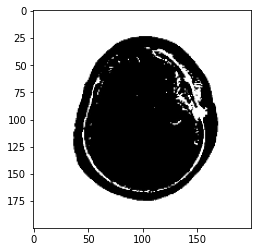

In [48]:
plt.imshow(X[0],cmap='gray')

In [49]:
X_updated=X.reshape(len(X),-1)
X_updated.shape

(2870, 40000)

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(X_updated,Y,random_state=10,test_size=.10)

In [51]:
xtrain.shape,xtest.shape

((2583, 40000), (287, 40000))

In [52]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [53]:
from sklearn.decomposition import PCA

In [54]:
print(xtrain.shape,xtest.shape)

pca=PCA(.98)
#pca_train=pca.fit_transform(xtrain)
#pca_test=pca.transform(xtest)
pca_train=xtrain
pca_test=xtest

(2583, 40000) (287, 40000)


In [55]:
#print(pca_train.shape,pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [57]:
lg=LogisticRegression()
lg.fit(pca_train,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [58]:
sv=SVC()
sv.fit(pca_train,ytrain)

SVC()

In [59]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(pca_train,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [60]:
print("Training score:",lg.score(pca_train,ytrain))
print("Testing score:",lg.score(pca_test,ytest))

Training score: 1.0
Testing score: 0.759581881533101


In [61]:
print("Training score:",sv.score(pca_train,ytrain))
print("Testing score:",sv.score(pca_test,ytest))

Training score: 0.9128919860627178
Testing score: 0.794425087108014


In [62]:
print("Training score:",knn.score(pca_train,ytrain))
print("Testing score:",knn.score(pca_test,ytest))

Training score: 0.9407665505226481
Testing score: 0.8362369337979094


In [63]:
pred=sv.predict(pca_test)
#printing indexes of misclassifications
np.where(ytest!=pred)

(array([ 15,  18,  19,  23,  37,  38,  39,  42,  45,  55,  57,  58,  60,
         66,  67,  71,  74,  75,  82,  83,  89,  96, 110, 111, 113, 114,
        115, 116, 141, 144, 152, 157, 166, 168, 175, 176, 177, 181, 184,
        188, 190, 191, 194, 197, 205, 210, 211, 214, 224, 227, 229, 238,
        244, 254, 259, 266, 278, 281, 282]),)

In [64]:
pred[6]

0

In [65]:
ytest[6]

0

In [66]:
#TEST MODEL

In [67]:
dec={0:'glioma_tumor',1:'meningioma_tumor',2:'no_tumor',3:'pituitary_tumor'}

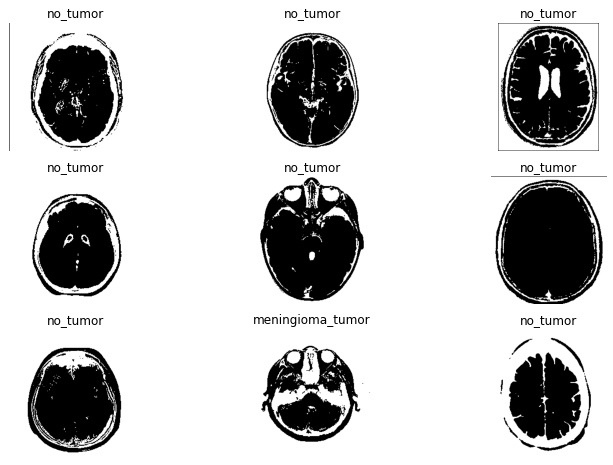

In [68]:
plt.figure(figsize=(12,8))
p=os.listdir(r'/content/drive/MyDrive/BrainTumor/InverseOtsu/Testing/')
c=1
for i in os.listdir(r'/content/drive/MyDrive/BrainTumor/InverseOtsu/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img=cv2.imread(r'/content/drive/MyDrive/BrainTumor/InverseOtsu/Testing/no_tumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1 

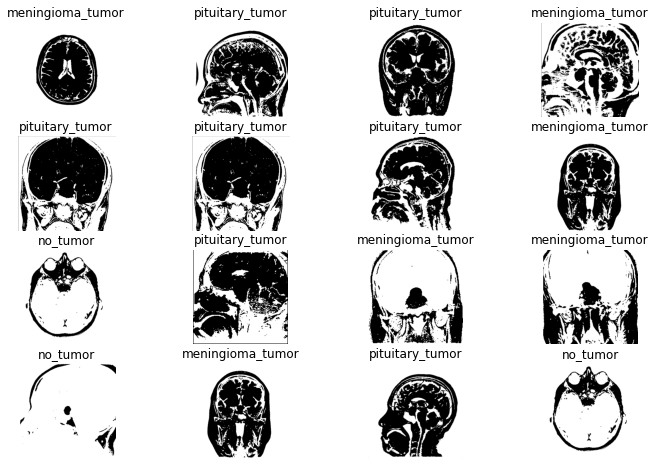

In [69]:
plt.figure(figsize=(12,8))
p=os.listdir(r'/content/drive/MyDrive/BrainTumor/InverseOtsu/Testing/')
c=1
for i in os.listdir(r'/content/drive/MyDrive/BrainTumor/InverseOtsu/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img=cv2.imread(r'/content/drive/MyDrive/BrainTumor/InverseOtsu/Testing/pituitary_tumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score

In [71]:
predicted_labels = sv.predict(xtest)
cnf_matrix = confusion_matrix(ytest, predicted_labels)
print(cnf_matrix)

[[59 15  0  0]
 [16 57  9  5]
 [ 2  6 25  2]
 [ 0  3  1 87]]


In [72]:
predicted_labels = knn.predict(xtest)
cnf_matrix = confusion_matrix(ytest, predicted_labels)
print(cnf_matrix)

[[62  9  2  1]
 [10 68  7  2]
 [ 5  2 25  3]
 [ 0  2  4 85]]


In [73]:
predicted_labels = lg.predict(xtest)
cnf_matrix = confusion_matrix(ytest, predicted_labels)
print(cnf_matrix)

[[47 23  2  2]
 [13 61 10  3]
 [ 1  5 27  2]
 [ 1  4  3 83]]


In [74]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingCVClassifier

In [36]:
scv=StackingCVClassifier(classifiers=[lg,knn,sv],meta_classifier=knn)
scv.fit(xtrain,ytrain)
scv_predicted = scv.predict(xtest)
scv_conf_matrix = confusion_matrix(ytest,scv_predicted)
scv_acc_score = accuracy_score(ytest, scv_predicted)
scv_f1_score = f1_score(ytest, scv_predicted,average='micro')

print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(ytest,scv_predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


confusion matrix
[[62 10  1  1]
 [ 8 68  8  3]
 [ 3  3 28  1]
 [ 0  3  3 85]]


Accuracy of StackingCVClassifier: 84.66898954703834 

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        74
           1       0.81      0.78      0.80        87
           2       0.70      0.80      0.75        35
           3       0.94      0.93      0.94        91

    accuracy                           0.85       287
   macro avg       0.83      0.84      0.83       287
weighted avg       0.85      0.85      0.85       287



In [37]:
cm = confusion_matrix(ytest, scv_predicted)
classes = ['Glioma','Meningioma','No tumor','Pituitary']

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')   

Confusion Matrix, without normalization
[[62 10  1  1]
 [ 8 68  8  3]
 [ 3  3 28  1]
 [ 0  3  3 85]]


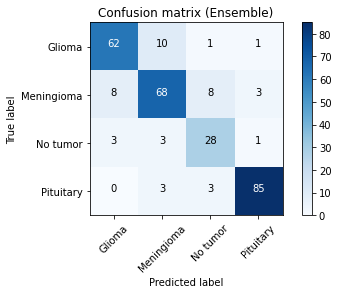

In [39]:
import itertools
plot=plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix (Ensemble)',
                          cmap=plt.cm.Blues)